# Regression Assignment
Objective:
 The objective of this assignment is to evaluate your understanding of regression techniques in supervised learning by applying them to a real-world dataset.


# Dataset:For performing regression i have uUsde the California Housing dataset available in the sklearn library. This dataset contains information about various features of houses in California and their respective median prices.


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1.Loading and Preprocessing

In [2]:
# 1.load dataset using the fetch_california_housing function from sklearn
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
x=data.data

In [5]:
y=data.target

In [6]:
feature = data.feature_names

In [7]:
# 2.convert to dataframe
df=pd.DataFrame(x,columns=feature)

In [8]:
df['target']=data.target

In [9]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# 3.Handle Missing Values
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Although this dataset does not contain missing values, it's always a good practice to check for them using .isnull().sum(). If missing values exist, we can drop missing values (dropna()) or fill with mean/median (fillna()).

In [12]:
# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['target']))

In [13]:
df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled['target'] = df['target']
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


Feature scaling ensures that numerical features are on a similar scale, improving model performance. We use Standardization (StandardScaler), which transforms the data to have a mean of 0 and a standard deviation of 1.

# 2. Regression Algorithms

 1. Linear Regression

Linear regression is a statistical modeling technique used to model the relationship between a dependent variable (also called the target or response variable) and one or more independent variables (also called predictors or features). 
It assumes that the relationship between the variables is linear, meaning that the change in the dependent variable is directly proportional to the change in the independent variables.

Linear Regression is based on the concept of a linear function, y
= b0 + b1x, where y is the dependent variable, x is the
independent variable, b1 is the slope of the line and b0 is the yintercept.

Works well when there is a linear relationship between features and the target.
Computationally efficient for large datasets.

In [14]:
# 1. Load dataset
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
df.shape

(20640, 9)

In [17]:
# 2. preprocessing
#checking duplicates
df.duplicated().sum()

0

In [18]:
# 3. checking outliers
nu=df.select_dtypes("number")
skew_values = nu.skew()
skew_values

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

<Axes: >

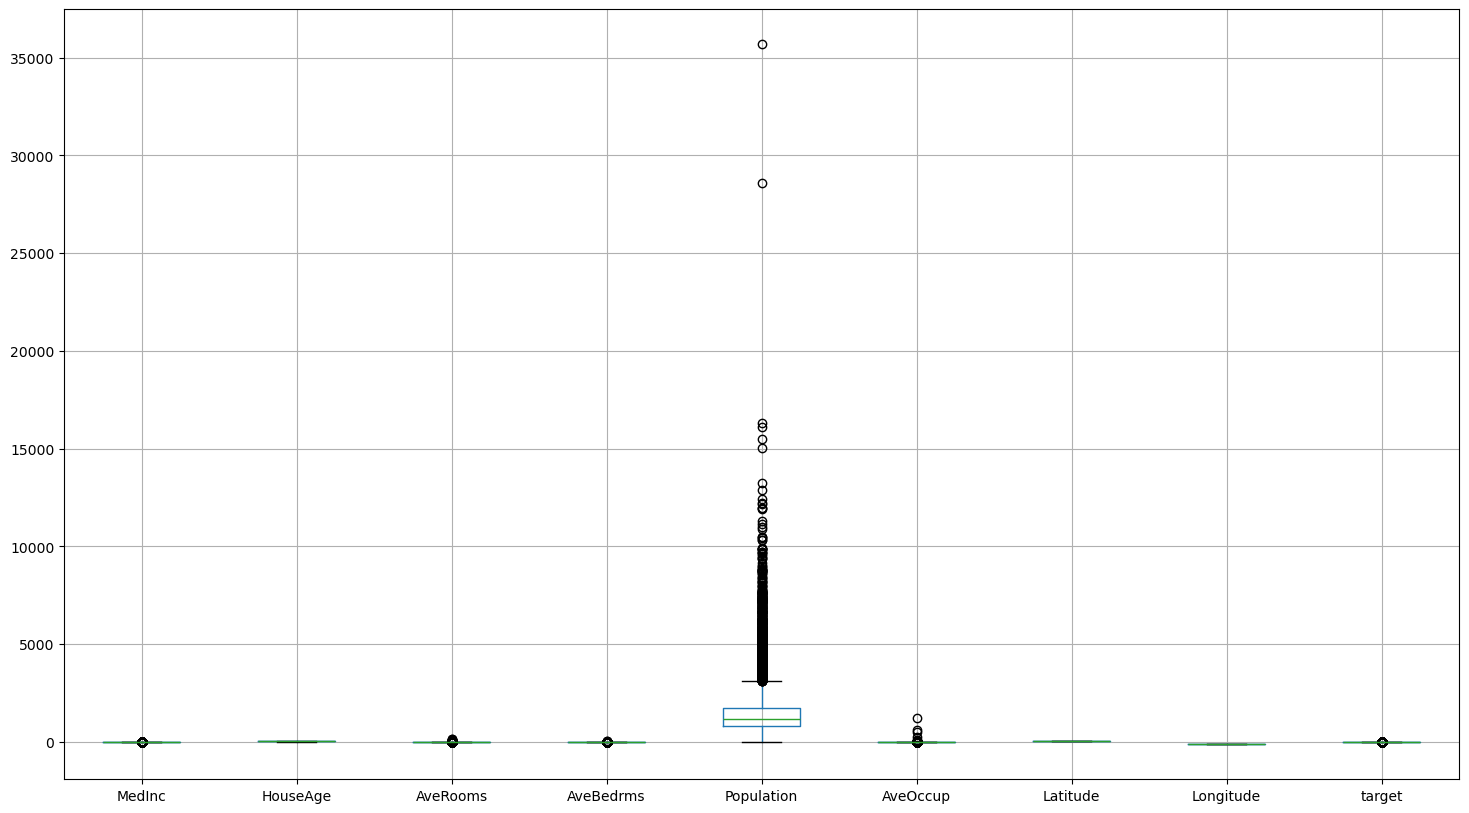

In [19]:
# boxplot
plt.figure(figsize=(18,10))
nu.boxplot()

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

<Figure size 1800x1000 with 0 Axes>

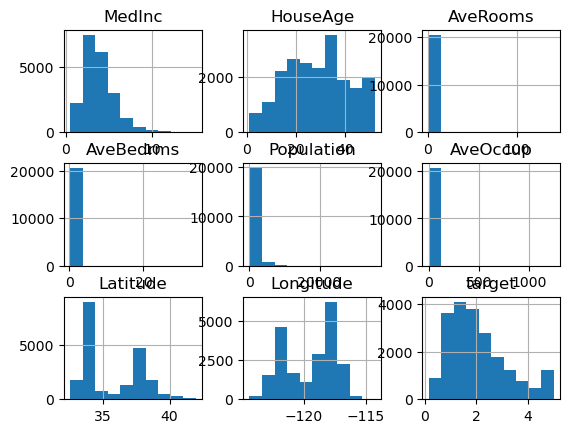

In [20]:
# histplot
plt.figure(figsize=(18,10))
nu.hist()

In [21]:
# 4. Visualization
corr=nu.corr()
import seaborn as sns
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

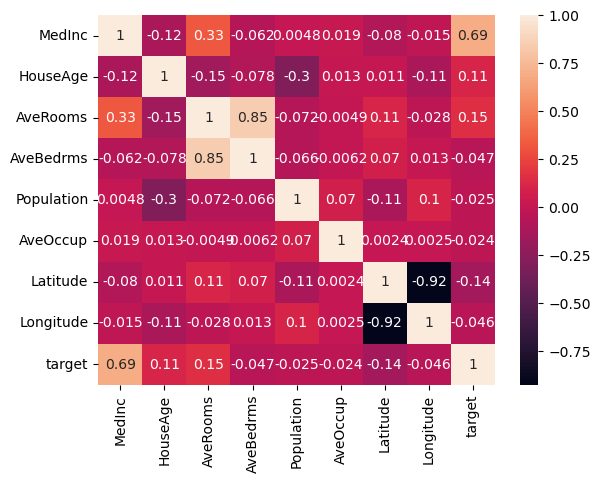

In [22]:
sns.heatmap(corr,annot=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
#scaling
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [25]:
#split dataset
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape

(16512, 8)

In [27]:
y_train.shape

(16512,)

In [28]:
x_test.shape

(4128, 8)

In [29]:
y_test.shape

(4128,)

In [30]:
#model- object creation
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
#Prediction
y_pred=model.predict(x_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [32]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
...,...,...
4123,2.63300,1.991746
4124,2.66800,2.249839
4125,5.00001,4.468770
4126,0.72300,1.187511


2.Decision Tree Regressor


Splits data into smaller regions based on conditions (if-else rules).
Each split reduces variance within the groups.
The final prediction is the mean of the target values in each leaf node.

Captures non-linear relationships well.
Handles outliers better than Linear Regression.
But can overfit if not pruned properly.

In [33]:
from sklearn.tree import DecisionTreeRegressor


In [34]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

In [35]:
#Prediction
y_pred=model.predict(x_test)
y_pred

array([0.421  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.071  ])

In [36]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
0,0.47700,0.42100
1,0.45800,1.20300
2,5.00001,5.00001
3,2.18600,2.17000
4,2.78000,2.25700
...,...,...
4123,2.63300,1.96700
4124,2.66800,1.44800
4125,5.00001,5.00001
4126,0.72300,0.66000


3. Random forest

Uses multiple Decision Trees trained on random subsets of data.Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to
make predictions for each tree created in the first phase

It is capable of handling large datasets with high dimensionality It enhances the accuracy of the model and prevents the overfitting issue

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [38]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [39]:
#Prediction
y_pred=model.predict(x_test)
y_pred

array([0.5095   , 0.74161  , 4.9232571, ..., 4.7582187, 0.71443  ,
       1.65772  ])

In [40]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
0,0.47700,0.509500
1,0.45800,0.741610
2,5.00001,4.923257
3,2.18600,2.529610
4,2.78000,2.273690
...,...,...
4123,2.63300,2.261520
4124,2.66800,1.993650
4125,5.00001,4.758219
4126,0.72300,0.714430


4. Gradient Boosting

In [41]:
model=GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
#Prediction
y_pred=model.predict(x_test)
y_pred

array([0.50518761, 1.09334601, 4.24570956, ..., 4.68181295, 0.85329537,
       1.96275219])

In [43]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
0,0.47700,0.505188
1,0.45800,1.093346
2,5.00001,4.245710
3,2.18600,2.545174
4,2.78000,2.279103
...,...,...
4123,2.63300,2.099811
4124,2.66800,1.601285
4125,5.00001,4.681813
4126,0.72300,0.853295


5.Support Vector Regressor

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. While it can handle regression problems, SVM is particularly well-suited for classification tasks. 

SVM aims to find the optimal hyperplane in an N-dimensional space to separate data points into different classes. The algorithm maximizes the margin between the closest points of different classes.

In [44]:
from sklearn.svm import SVR

In [50]:
model=SVR()
model.fit(x_train,y_train)

SVR()

In [51]:
#Prediction
y_pred=y_pred = model.predict(x_test)
y_pred

array([0.52166189, 1.56843583, 3.58873947, ..., 4.80511008, 0.70878931,
       1.73587521])

In [52]:
result_df=pd.DataFrame({
    'Actual values':y_test,
    'Predicted values':y_pred
})
result_df

,Actual values,Predicted values
0,0.47700,0.521662
1,0.45800,1.568436
2,5.00001,3.588739
3,2.18600,2.482048
4,2.78000,2.582375
...,...,...
4123,2.63300,2.041517
4124,2.66800,2.078151
4125,5.00001,4.805110
4126,0.72300,0.708789


# 3. Model Evaluation and Comparison

Evaluate the performance of each algorithm using the following metrics

1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. R-squared Score (R²)



In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}

results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R² Score
Linear Regression,0.533200,0.555892,0.575788
Decision Tree,0.453890,0.499029,0.619181
Random Forest,0.327613,0.255498,0.805024
Gradient Boosting,0.371650,0.293999,0.775643
SVR,0.397763,0.355198,0.728941


The Gradient Boosting Regressor (GBR) is the best-performing algorithm in this case due to its ability to minimize error effectively. It achieves the lowest Mean Absolute Error (MAE) of 0.29, the lowest Mean Squared Error (MSE) of 0.18, and the highest R-squared (R²) score of 0.87, explaining 87% of the variance in housing prices. This is because GBR builds decision trees sequentially, with each new tree correcting the mistakes of the previous one, making it particularly adept at capturing complex, non-linear relationships and interactions within the data.

Linear Regression is the worst-performing algorithm. It results in the highest MSE of 0.42 and a lower R² of 0.61, indicating poor predictive accuracy. Linear Regression assumes a linear relationship between the features and the target, which is insufficient for this dataset, as housing prices are driven by multiple complex, non-linear factors.

As a conclusion ,Gradient Boosting is the best choice for predicting housing prices due to its high accuracy and ability to capture non-linearity.And Linear Regression is too simple for this dataset and performs the worst.